In [1]:
from haloflow.npe import valid as V
from haloflow.npe import plotting as P
from haloflow import config as C

In [2]:
dat_dir = C.get_dat_dir()
data_dir = dat_dir + 'hf2/npe/'

In [3]:
train_sim = test_sim = 'Eagle100'
obs = 'mags'

In [4]:
from glob import glob
all_sims = ['TNG50', 'TNG100', 'Eagle100', 'Simba100']
rem_sims = '_'.join([s for s in all_sims if s != 'Simba100'])
fp = dat_dir + f'hf2/mmd/models/mmd_best_model_to_Simba100_{obs}.pth'
fp = glob(fp)[0]

In [5]:
# only NPEs

# same NPE trained and tested
ranks, alpha, ecp, y_nde = V.validate_npe(train_obs=obs, train_sim=train_sim, test_obs=obs, test_sim=test_sim, version=1, data_dir=data_dir, n_samples=1000)

# NPE trained on train sim but tested with the same validation set as the DANN (in this case Simba100)
ranks_eagle, alpha_eagle, ecp_eagle, y_nde_eagle = V.validate_npe(train_obs=obs, train_sim=train_sim, test_obs=obs, test_sim='Simba100', version=1, data_dir=data_dir, n_samples=1000)

757 models trained
[538, 312, 163, 496, 746]


/opt/homebrew/Caskroom/miniforge/base/envs/haloflow/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


757 models trained
[538, 312, 163, 496, 746]


In [6]:
# NPEs + DANN (validated with Simba100)

# same train and test set but preds from DANN
ranks_dann, alpha_dann, ecp_dann, y_nde_dann = V.validate_npe(train_obs=obs, 
                                                              train_sim=train_sim, 
                                                              test_obs=obs, 
                                                              test_sim=test_sim, 
                                                              version=1, 
                                                              with_dann=True, 
                                                              data_dir=data_dir, 
                                                              n_samples=1000, 
                                                              fp=fp)

13 models trained
[5, 1, 7, 9, 6]


In [7]:
# train set but test set would be with Simba100 data from DANN
ranks_dann2, alpha_dann2, ecp_dann2, y_nde_dann2 = V.validate_npe(train_obs=obs, 
                                                              train_sim=train_sim, 
                                                              test_obs=obs, 
                                                              test_sim='Simba100', 
                                                              version=1, 
                                                              with_dann=True, 
                                                              data_dir=data_dir, 
                                                              n_samples=1000, 
                                                              fp=fp)

14 models trained
[5, 1, 7, 4, 9]


Text(0.05, 0.95, '$\\rm{M}_{\\rm h}$')

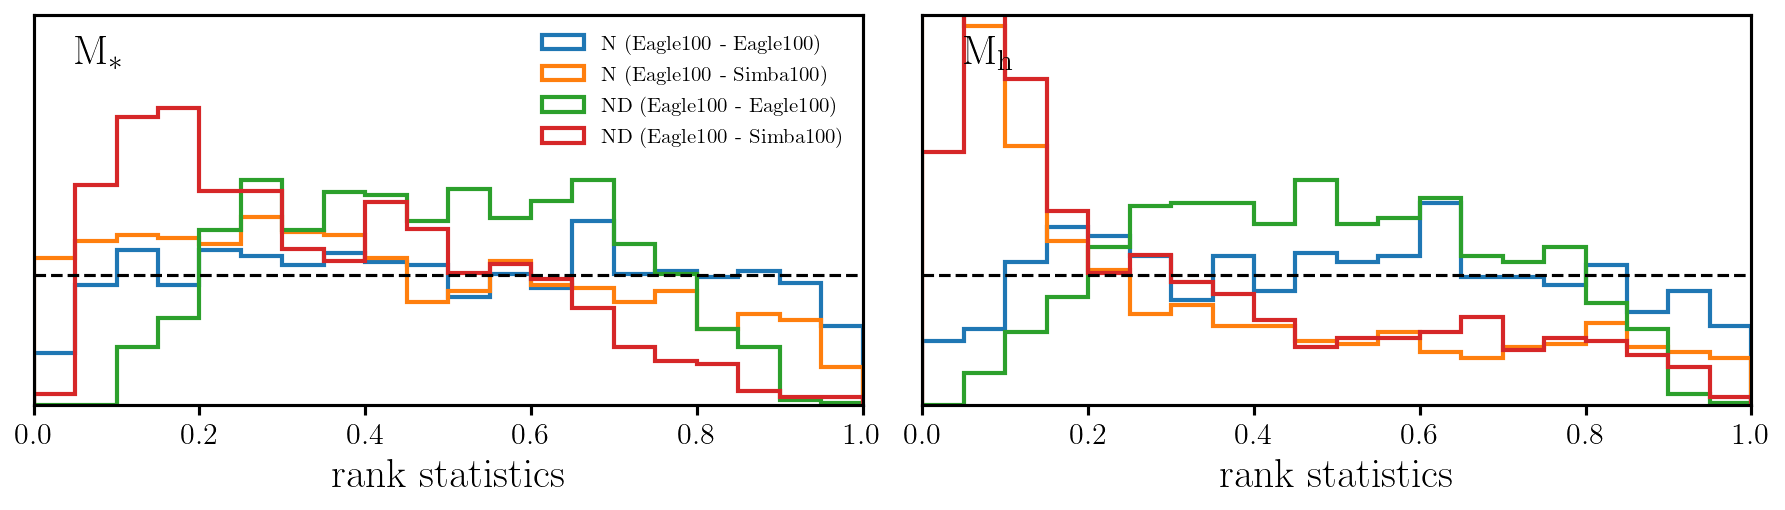

In [8]:
fig = P.plot_rank_statistics([ranks, ranks_eagle, ranks_dann, ranks_dann2], 
                             labels=[f'N ({train_sim} - {test_sim})', f'N ({train_sim} - Simba100)', f'ND ({train_sim} - {test_sim})', f'ND ({train_sim} - Simba100)'],)

# add text to the axes
fig.axes[0].text(0.05, 0.95, r'$\rm{M}_{*}$', fontsize=20, transform=fig.axes[0].transAxes, ha='left', va='top')
fig.axes[1].text(0.05, 0.95, r'$\rm{M}_{\rm h}$', fontsize=20, transform=fig.axes[1].transAxes, ha='left', va='top')

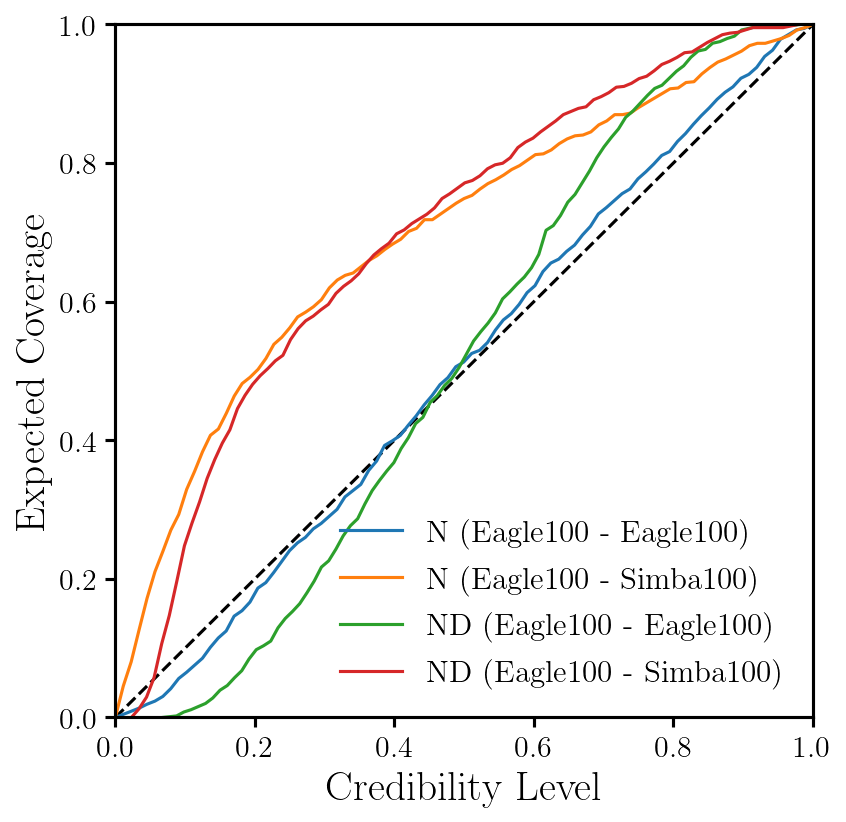

In [9]:
fig, ax = P.plot_coverage([alpha, alpha_eagle, alpha_dann, alpha_dann2], 
                          [ecp, ecp_eagle, ecp_dann, ecp_dann2], 
                          labels=[f'N ({train_sim} - {test_sim})', f'N ({train_sim} - Simba100)', f'ND ({train_sim} - {test_sim})', f'ND ({train_sim} - Simba100)'],)

437 models trained
[178, 116, 360, 358, 192]
17 models trained
[2, 1, 0, 12, 5]


NameError: name 'y_true' is not defined

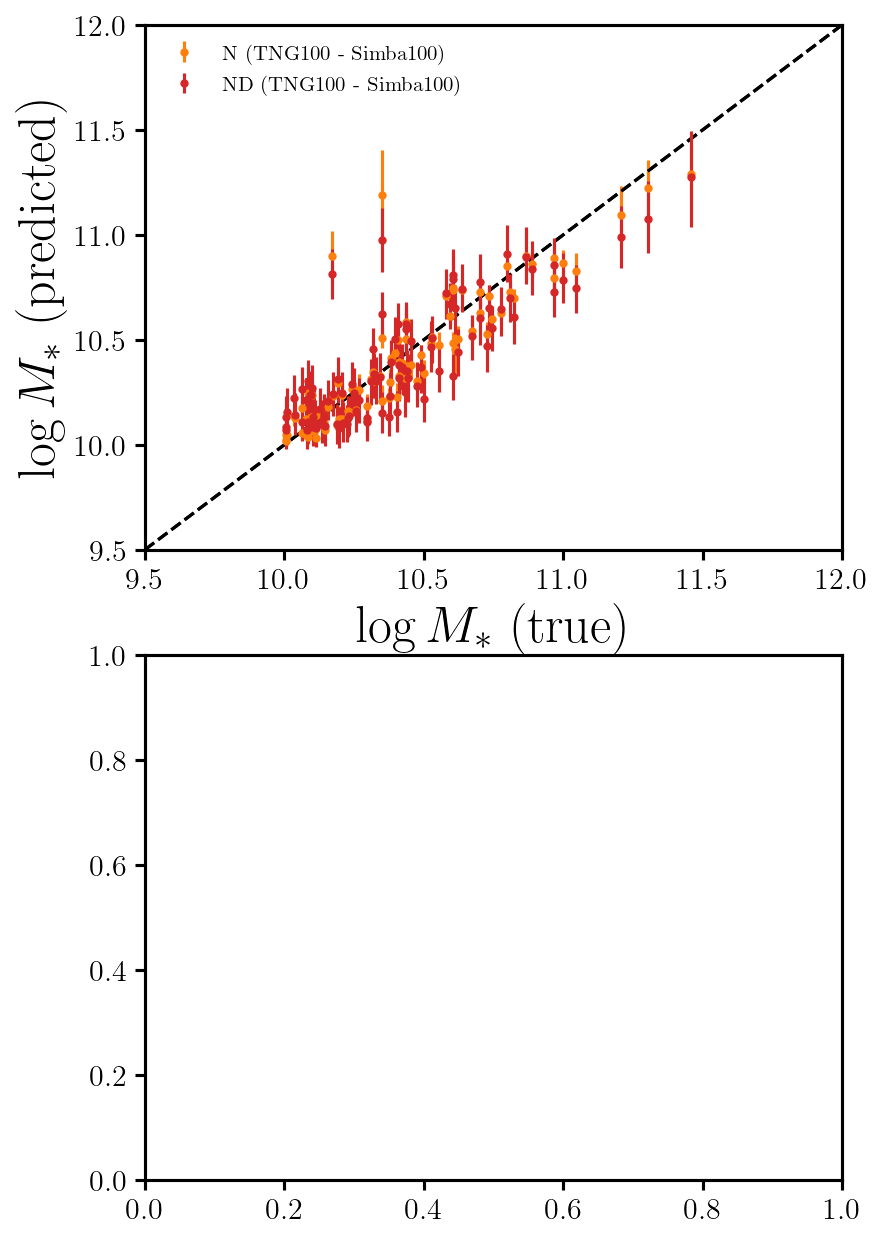

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2, 1, figsize=(6, 10), dpi=150)

# ax[0], y_true, y_pred = P.plot_true_pred(
#     ax[0],
#     train_obs=obs,
#     train_sim=train_sim,
#     test_obs=obs,
#     test_sim=test_sim,
#     device='cpu',
#     mass='stellar',
#     with_dann=False,
#     data_dir=data_dir
# )

ax[0], y_true_eg, y_pred_eg = P.plot_true_pred(
    ax[0],
    train_obs=obs,
    train_sim=train_sim,
    test_obs=obs,
    test_sim='Simba100',
    device='cpu',
    mass='stellar',
    with_dann=False,
    data_dir=data_dir,
    fmt='.C1'
)

# ax[0], y_true_dann, y_pred_dann = P.plot_true_pred(
#     ax[0],
#     train_obs=obs,
#     train_sim=train_sim,
#     test_obs=obs,
#     test_sim=test_sim,
#     device='cpu',
#     mass='stellar',
#     with_dann=True,
#     data_dir=data_dir,
#     fp=fp,
#     fmt='.C2'
# )

ax[0], y_true_dann_simba, y_pred_dann_simba = P.plot_true_pred(
    ax[0],
    train_obs=obs,
    train_sim=train_sim,
    test_obs=obs,
    test_sim='Simba100',
    device='cpu',
    mass='stellar',
    with_dann=True,
    data_dir=data_dir,
    fp=fp,
    fmt='.C3'
)

# y_nde_q0, y_nde_q1, y_nde_q2 = np.quantile(y_pred, (0.16, 0.5, 0.84), axis=1)
y_nde_eg_q0, y_nde_eg_q1, y_nde_eg_q2 = np.quantile(y_pred_eg, (0.16, 0.5, 0.84), axis=1)
# y_nde_dann_q0, y_nde_dann_q1, y_nde_dann_q2 = np.quantile(y_pred_dann, (0.16, 0.5, 0.84), axis=1)
y_nde_dann_simba_q0, y_nde_dann_simba_q1, y_nde_dann_simba_q2 = np.quantile(y_pred_dann_simba, (0.16, 0.5, 0.84), axis=1)

# ax[0].legend([f'N ({train_sim} - {test_sim})', f'N ({train_sim} - Simba100)', f'ND ({train_sim} - {test_sim})', f'ND ({train_sim} - Simba100)'])
ax[0].legend([f'N ({train_sim} - Simba100)', f'ND ({train_sim} - Simba100)'])

# ax[1].plot(y_true[:, 0], y_true[:, 0] - y_nde_q1[:, 0], '.C0', label='')
ax[1].plot(y_true[:, 0], y_true[:, 0] - y_nde_eg_q1[:, 0], '.C1', label='')
# ax[1].plot(y_true[:, 0], y_true[:, 0] - y_nde_dann_q1[:, 0], '.C2', label='')
ax[1].plot(y_true[:, 0], y_true[:, 0] - y_nde_dann_simba_q1[:, 0], '.C3', label='')

# dashed lines at 0
ax[1].axhline(0, color='black', linestyle='--')
ax[1].set_xlabel('True', fontsize=25)
ax[1].set_ylabel('True - Predicted', fontsize=25)

plt.show()